# Predicting house prices

In this lesson, we'll explore the boston housing dataset (which is built into `sklearn`), and walk through some basic principles of setting up and building, tuning and selecting a valid machine learning model.

This lesson will use `sklearn` in conjunction with several `skutil` preprocessing techniques.

In [2]:
from __future__ import print_function, division
import sklearn
import skutil
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

print('sklearn: %s' % sklearn.__version__)
print('skutil:  %s' % skutil.__version__)
print('pandas:  %s' % pd.__version__)
print('numpy:   %s' % np.__version__)

sklearn: 0.17.1
skutil:  0.0.12
pandas:  0.18.1
numpy:   1.11.0


### Loading and inspecting our data

We can load our pandas dataframe and examine a sample of the data we'll be working with. On first glance, it appears every feature is numeric. This is certainly cleaner than most realworld datasets!

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()
X = pd.DataFrame.from_records(data=boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Let's examine the first few values of our target variable. Notice the value is a real number and not a class, indicating we'll we using regressive models and not classification.

In [4]:
y = boston.target
y[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

By examining the `dtypes` (data types) attribute of the dataframe, our suspicion is confirmed: all of the features *are* in fact numeric. Below, we also take a look at whether there are any missing values. Luckily, in this example there are not.

In [5]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [25]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Cleaning & preprocessing data

Uncommonly&mdash;if not never&mdash;will your data *not* need any sort of preprocessing. Be it noisy features, skewed variables, redundant or uninformative features, your data will generally always need some massaging.

One thing to be aware of is whether your input is shuffled or in order... __if your data is ordered, know why__. For example, let's build a `RandomForestRegressor` on the first few rows of `X`, and validate the model on the last rows:

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

def rmse(act, pred):
    return np.sqrt(mean_squared_error(act, pred))

# define the model
model = RandomForestRegressor(random_state=42)

# fit the model
model.fit(X[:350], y[:350])

# assess performance
print('Train R^2: %.5f'  % r2_score(y[:350], model.predict(X[:350])))
print('Train RMSE: %.5f\n' % rmse(y[:350], model.predict(X[:350])))

print('Test R^2: %.5f'  % r2_score(y[350:], model.predict(X[350:])))
print('Test RMSE: %.5f' % rmse(y[350:], model.predict(X[350:])))

Train R^2: 0.97543
Train RMSE: 1.32625

Test R^2: 0.16424
Test RMSE: 7.44935


Notice the extreme drop-off in validation performance! It's likely there are phenomena in the test data that were not observed in the training data, and the model was not induced to capture such nuances.

### The `train_test_split`

The sooner you can split your data, the better. `sklearn` provides a built-in mechanism for just this: `sklearn.cross_validation.train_test_split`. This will split your data to the specified size, and shuffle the observations at the same time. 

Notice we create two splits:
  - Train&mdash;the set on which we'll develop our model
  - Test&mdash;the set we'll use to select our final model. __We don't touch this until the end!__

In [30]:
from sklearn.cross_validation import train_test_split

# split the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [31]:
# fit the model
model.fit(X_train, y_train)

# assess performance
print('Train R^2: %.5f'  % r2_score(y_train, model.predict(X_train)))
print('Train RMSE: %.5f\n' % rmse(y_train, model.predict(X_train)))

print('Test R^2: %.5f'  % r2_score(y_test, model.predict(X_test)))
print('Test RMSE: %.5f' % rmse(y_test, model.predict(X_test)))

Train R^2: 0.95947
Train RMSE: 1.83760

Test R^2: 0.90997
Test RMSE: 2.79551


Notice that our test performance is now much more similar to our training performance. 

__Note:__ *It is bad practice to evaluate your model against your test set whilst modeling, but this was just to exemplify how shuffling observations can have a dramatic impact.*


### Transforming features

How can we make this model perform better? There may be some strange/skewed distributions within our data that we could coerce into a more normal shape. Let's take a look at just a few (you could do this for all features, but for the sake of example, we'll only look at a handful).

In [32]:
# start by defining a very simple histogram function
def hist(x, scale = 1, style = 'darkgrid', left = None, right = None, xlab='Count', ylab='Y'):
    x = x if not isinstance(x, pd.Series) else x.tolist()
    
    figure = plt.figure()
    
    sns.set(style = style)
    sns.distplot(x * scale, hist = True, kde = False, norm_hist = True)
    
    ax = figure.get_axes()[0]
    ax.set_xlim(left  = left  or int(np.ceil(np.min(x))), 
                right = right or int(np.ceil(np.max(x))))
    
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

Notice the crime feature is quite skewed. We may be able to make it more normal with a `BoxCoxTransformer`. We can apply this technique to other features as well, but it is not always guaranteed to work well.

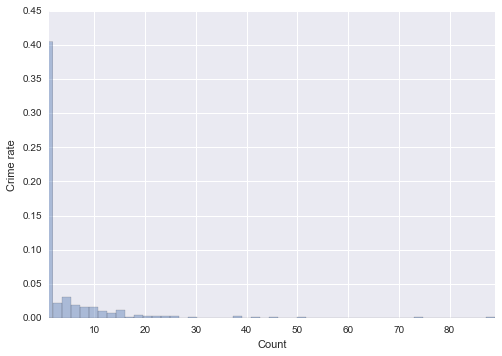

In [43]:
hist(x=X_train.CRIM, ylab='Crime rate')

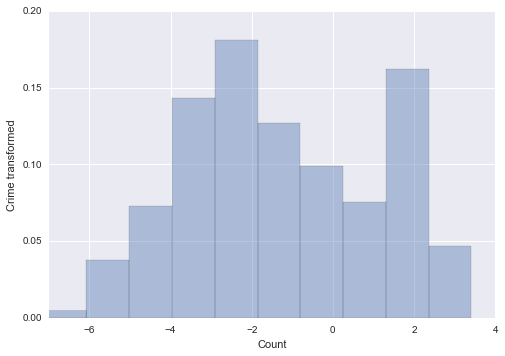

In [44]:
from skutil.preprocessing import BoxCoxTransformer

hist(BoxCoxTransformer(cols=['CRIM']).fit_transform(X_train).CRIM.tolist(), ylab='Crime transformed')

### Feature selection

How do we know which features to retain? In this toy example, we have a manageable amount of features, however in the text analytics or computer vision domains, we often have >100,000 features. Let's explore techniques for reducing this high dimensionality without impacting the predictive power of our model (in no particular order):

__1. Eliminate multicollinearity:__

In [46]:
from skutil.feature_selection import MulticollinearityFilterer

# let's see if any features are collinear with one another:
fltr = MulticollinearityFilterer(threshold=0.9).fit(X_train)

# examine the drop attribute
fltr.drop

['TAX']

The `MulticollinearityFilterer` searches through a correlation matrix for any correlations greater than the provided threshold. When a high correlation is observed between two variables, the function examines the mean absolute correlation of each feature and removes the one that is most highly-correlated with other features as well.

__2. Eliminate features with near zero variance__:

In [52]:
from skutil.feature_selection import NearZeroVarianceFilterer

# define and fit the filterer
fltr = NearZeroVarianceFilterer(threshold=1e-4).fit(X_train)

# examine the dropped cols
fltr.drop

Notice there are no features with variance less than the threshold, so the result was `None`. If we wanted, we could adjust that threshold.

__3. PCA ([Principal Component Analysis](https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf))__

*(Note that this isn't actually a feature selection technique, but a feature reduction technique that results in a set of features which are linear combinations of the original input space)*

In [53]:
from skutil.decomposition import SelectivePCA

# define and fit
pca = SelectivePCA(n_components=0.85).fit(X_train)

# examine the head
pca.transform(X_train).head()

,PC1,PC2
0,-127.032002,-0.580292
1,40.341698,-111.797891
2,242.887926,116.939897
3,-157.131713,-14.872539
4,21.197731,17.834017


Notice we effectively reduced the input space to two dimensions while retaining at least 85% of the variability in the matrix!

### Putting it all together in a model

How can we use all of the aforementioned techniques to preprocess our data prior to modeling?

In [55]:
from skutil.preprocessing import SelectiveScaler

# multicollinearity
mcf = MulticollinearityFilterer(threshold=0.9).fit(X_train)
mcf_train = mcf.transform(X_train)

# near zero variance
nzv = NearZeroVarianceFilterer(threshold=1e-4).fit(mcf_train)
nzv_train = nzv.transform(mcf_train)

# box-cox
bc = BoxCoxTransformer(cols=['CRIM']).fit(nzv_train)
bc_train = bc.transform(nzv_train)

# add a step: scaling
scl = SelectiveScaler().fit(bc_train)
scl_train = scl.transform(bc_train)

# pca
pca = SelectivePCA(n_components=0.85).fit(scl_train)
pca_train = pca.transform(scl_train)

# fit the model
model.fit(pca_train, y_train)

# assess performance
print('Train R^2: %.5f'  % r2_score(y_train, model.predict(pca_train)))
print('Train RMSE: %.5f\n' % rmse(y_train, model.predict(pca_train)))

Train R^2: 0.93301
Train RMSE: 2.36250



That's nice, but it's kind of a mess. What if we have a ton of preprocessors to keep track of? Things could get hairy. That's what the __`Pipeline`__ object is for. `Pipeline` stores a sequence of *named transformers* with an optional `BaseEstimator` as the last element. The only arg in the `Pipeline` constructor is a single list of tuples:

    pipe = Pipeline([
        ('name_of_first_step',  FirstTransformer()),
        ('name_of_second_step', SecondTransformer())
    ])

In [60]:
from sklearn.pipeline import Pipeline

# define our pipe
pipe = Pipeline([
        ('mc',  MulticollinearityFilterer(threshold=0.9)),
        ('nzv', NearZeroVarianceFilterer(threshold=1e-4)),
        ('bc',  BoxCoxTransformer(cols=['CRIM'])),
        ('sc',  SelectiveScaler()),
        ('pca', SelectivePCA(n_components=0.85)),
        ('rf',  RandomForestRegressor(random_state=42))
    ])

# fit our pipeline
pipe.fit(X_train, y_train)

# assess performance
print('Train R^2: %.5f'  % r2_score(y_train, pipe.predict(X_train)))
print('Train RMSE: %.5f\n'   % rmse(y_train, pipe.predict(X_train)))

Train R^2: 0.93301
Train RMSE: 2.36250



Notice we get the exact same results, but the code is much more elegant with fewer intermediate variables lying around. 

However, at a closer inspection, we can see that our results are not as good as they were before preprocessing. Presumably, if we could tweak our preprocessing hyperparameters to optimize our algorithm, we could identify a model with better performance. Furthermore, the astute will note that we have not yet introduced any __cross validation__:

In [61]:
from sklearn.cross_validation import KFold

# the default sklearn cross validation does NOT shuffle, and you know how we feel about that...
custom_cv = KFold(n=y_train.shape[0], n_folds=5, shuffle=True, random_state=42)

Now we introduce the __grid search__, the mechanism by which we will search over a random space of hyperparameters, building cross-validated models at each iteration and retaining the model that performs best.

In [66]:
# make sure to use the SKUTIL grid search for DF compatability, and not the SKLEARN one.
from skutil.grid_search import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# define our pipe
pipe = Pipeline([
        ('mc',  MulticollinearityFilterer(threshold=0.9)),
        ('nzv', NearZeroVarianceFilterer(threshold=1e-4)),
        ('bc',  BoxCoxTransformer()),
        ('sc',  SelectiveScaler()),
        ('pca', SelectivePCA(n_components=0.85)),
        ('rf',  RandomForestRegressor(random_state=42))
    ])

# let's define the hyperparameters we'll search over. Notice the form of:
# '<stage_nm>__<arg_nm>'
hyperparams = {
    'mc__threshold'        : uniform(0.80, 0.15),
    'nzv__threshold'       : [1e-4, 1e-2, 0.05],
    'sc__scaler'           : [StandardScaler(), RobustScaler(), MinMaxScaler()],
    'pca__n_components'    : uniform(0.85, 0.2),
    'pca__whiten'          : [True, False],
    'rf__n_estimators'     : randint(15, 150),
    'rf__max_depth'        : randint(5, 50),
    'rf__min_samples_split': randint(2, 5),
    'rf__min_samples_leaf' : randint(1, 3),
    'rf__bootstrap'        : [True, False]
}

# define and fit
search = RandomizedSearchCV(pipe, hyperparams, cv=custom_cv, random_state=42, n_iter=10)
search.fit(X_train, y_train)

# assess performance
print('Train R^2: %.5f'  % r2_score(y_train, search.predict(X_train)))
print('Train RMSE: %.5f\n'   % rmse(y_train, search.predict(X_train)))

Train R^2: 0.94191
Train RMSE: 2.19996



That's better! We can actually view our grid results like so:

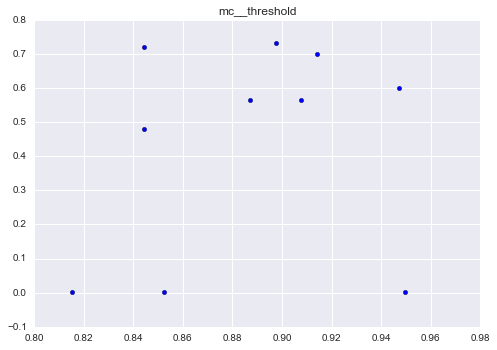

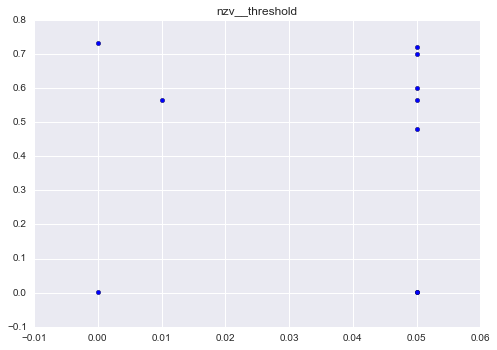

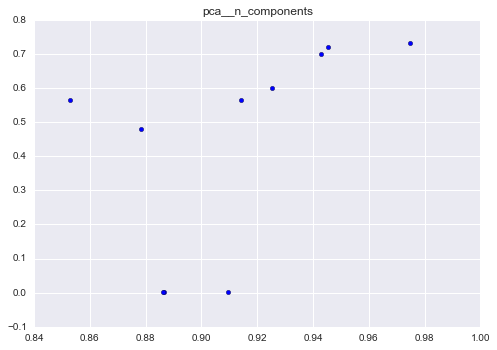

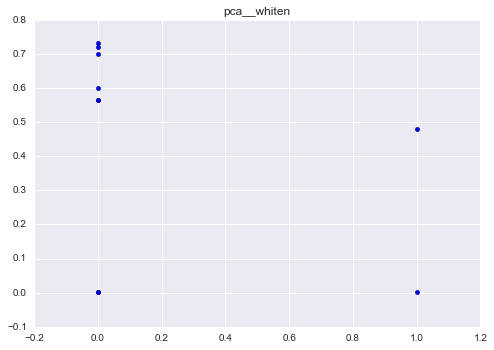

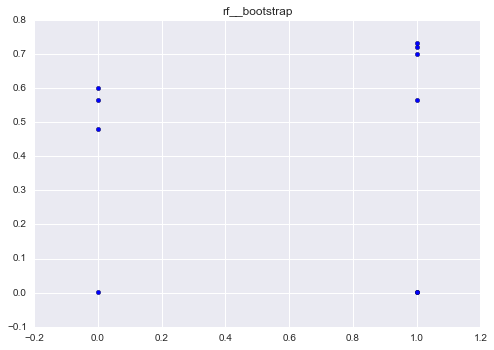

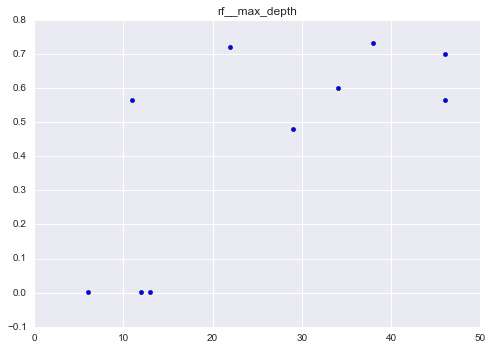

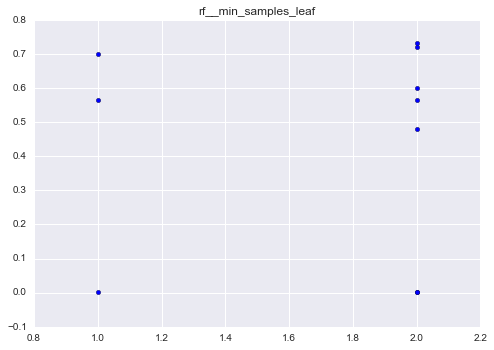

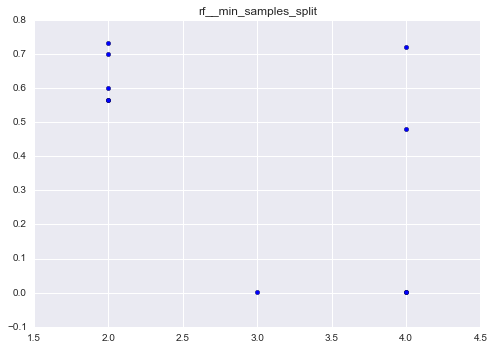

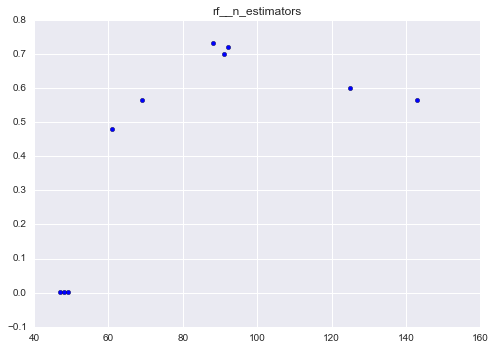

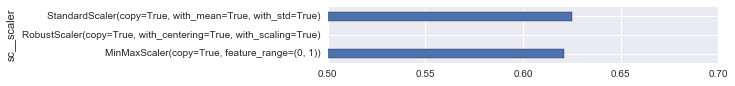

,mc__threshold,nzv__threshold,pca__n_components,pca__whiten,rf__bootstrap,rf__max_depth,rf__min_samples_leaf,rf__min_samples_split,rf__n_estimators,sc__scaler,score,std
7,0.897535,0.0001,0.974878,False,True,38,2,2,88,"StandardScaler(copy=True, with_mean=True, with...",0.732939,0.198438
1,0.844390,0.0500,0.945233,False,True,22,2,4,92,"StandardScaler(copy=True, with_mean=True, with...",0.720002,0.239932
0,0.914204,0.0500,0.942786,False,True,46,1,2,91,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.699571,0.140645
9,0.946992,0.0500,0.925367,False,False,34,2,2,125,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.599463,0.174391
5,0.887159,0.0100,0.914093,False,False,46,1,2,69,"StandardScaler(copy=True, with_mean=True, with...",0.566240,0.281318
2,0.907824,0.0500,0.852737,False,True,11,2,2,143,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.564402,0.245087
3,0.844234,0.0500,0.878161,True,False,29,2,4,61,"StandardScaler(copy=True, with_mean=True, with...",0.480873,0.140829
6,0.815208,0.0001,0.909565,False,False,13,2,4,48,"RobustScaler(copy=True, with_centering=True, w...",0.002336,0.023562
4,0.949640,0.0500,0.886405,False,True,12,2,4,49,"RobustScaler(copy=True, with_centering=True, w...",0.001396,0.025003
8,0.852254,0.0500,0.886292,True,True,6,1,3,47,"RobustScaler(copy=True, with_centering=True, w...",0.000914,0.025443


In [67]:
from skutil.utils import report_grid_score_detail
report_grid_score_detail(random_search=search, charts=True)

In viewing these results, we can make educated decisions on refining our grid such that we don't waste time searching over parameters that detrimentally impact the performace.

In [68]:
# define our pipe
pipe = Pipeline([
        ('mc',  MulticollinearityFilterer(threshold=0.9)),
        ('nzv', NearZeroVarianceFilterer(threshold=1e-4)),
        ('bc',  BoxCoxTransformer()),
        ('sc',  SelectiveScaler()),
        ('pca', SelectivePCA(n_components=0.85)),
        ('rf',  RandomForestRegressor(random_state=42))
    ])

# let's define the hyperparameters we'll search over. Notice the form of:
# '<stage_nm>__<arg_nm>'
hyperparams = {
    'mc__threshold'        : uniform(0.80, 0.15),
    # 'nzv__threshold'       : [1e-4, 1e-2, 0.05], # not going to bother
    'sc__scaler'           : [StandardScaler(), RobustScaler(), MinMaxScaler()],
    'pca__n_components'    : uniform(0.95, 0.05),  # min = 0.95 now
    # 'pca__whiten'          : [True, False],      # no longer whiten
    'rf__n_estimators'     : randint(90, 200),     # min = 90 now, max = 200
    'rf__max_depth'        : randint(25, 50),      # min = 25 now
    'rf__min_samples_split': randint(2, 5),
    'rf__min_samples_leaf' : randint(1, 3),
    'rf__bootstrap'        : [True, False]
}

# define and fit
search = RandomizedSearchCV(pipe, hyperparams, cv=custom_cv, random_state=42, n_iter=15) # incremented to 15 X
search.fit(X_train, y_train)

# assess performance
print('Train R^2: %.5f'  % r2_score(y_train, search.predict(X_train)))
print('Train RMSE: %.5f\n'   % rmse(y_train, search.predict(X_train)))

Train R^2: 0.94808
Train RMSE: 2.07990



### Trying a different model

We have a pretty good `RandomForestRegressor` at this point... why don't we try a different model?

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

# define our pipe
gbm_pipe = Pipeline([
        ('mc',  MulticollinearityFilterer(threshold=0.9)),
        ('nzv', NearZeroVarianceFilterer(threshold=1e-4)),
        ('bc',  BoxCoxTransformer()),
        ('sc',  SelectiveScaler()),
        ('pca', SelectivePCA(n_components=0.85)),
        ('gbm', GradientBoostingRegressor(random_state=42))
    ])

# let's define the hyperparameters we'll search over.
gbm_hyperparams = {
    'mc__threshold'        : uniform(0.80, 0.15),
    'sc__scaler'           : [StandardScaler(), RobustScaler(), MinMaxScaler()],
    'pca__n_components'    : uniform(0.95, 0.05),
    'gbm__n_estimators'    : randint(90, 200),
    'gbm__learning_rate'   : uniform(0.075, 0.05),
    'gbm__max_depth'       : randint(2, 7), # we grow these more shallow
}

# define and fit
gbm_search = RandomizedSearchCV(gbm_pipe, gbm_hyperparams, cv=custom_cv, random_state=42, n_iter=15)
gbm_search.fit(X_train, y_train)

# assess performance
print('Train R^2: %.5f'  % r2_score(y_train, gbm_search.predict(X_train)))
print('Train RMSE: %.5f\n'   % rmse(y_train, gbm_search.predict(X_train)))

Train R^2: 0.99998
Train RMSE: 0.03995



Wow, that looks fantastic! However, GBMs are much more likely to overfit the data. We'll need to see how it performs on the holdout set to determine whether it's actually a good model.

### Evaluating performance on our holdout set

This happens *once*. When you've built a selection of models, we evaluate each __one time__ against the holdout set for our final model selection.

In [73]:
# examine RF performance
print('RF test R^2: %.5f'  % r2_score(y_test, search.predict(X_test)))
print('RF test RMSE: %.5f\n' % rmse(y_test,     search.predict(X_test)))

# examine GBM performance
print('GBM test R^2: %.5f'  % r2_score(y_test, gbm_search.predict(X_test)))
print('GBM test RMSE: %.5f' % rmse(y_test,     gbm_search.predict(X_test)))

RF test R^2: 0.82640
RF test RMSE: 3.88196

GBM test R^2: 0.81255
GBM test RMSE: 4.03380


We can see that we've likely overfit our GBM (given the dramatic drop off in performance). We could return and tune the models to diminish this effect, but for the sake of example, we'll say our RF was our better model. __See the [next demo](https://github.com/tgsmith61591/skutil/blob/master/doc/examples/pipeline/skutil%20grid%20demo.ipynb)__ for information on how to persist models to disk.